# Random Forest on English hand written digits with 16 extracted features
The source code is a simple implementation for English hand written digits classification based on 16 extracted features with the python programming language and Random Forest. Each tree of random forest was trained by 3 random feature and maximum depth of each tree is 3 as well. 

# Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour/

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from statistics import mode
from sklearn.ensemble import RandomForestClassifier

sns.set(style = "darkgrid")
plt.rcParams["figure.figsize"] = (10,6)


In [62]:
#loading data
train_data = pd.read_csv("./data_train.csv",  names=list(range(16))+["class"])
test_data = pd.read_csv("./data_test.csv",  names=list(range(16))+["class"])

#shuffle data
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [63]:
# make single decision tree classifier with maximum depth 3
def MakeDecisionTreeClassifier(x,y):
    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model.fit(x,y)
    return model 

def CalculateMetricsAndPlot(true_label, predicted_label,color='Greens'):
    #calculate metrics
    CM = confusion_matrix(true_label, predicted_label)
    acc = round(accuracy_score(true_label,predicted_label)*100,2)
    precision = round(precision_score(true_label,predicted_label, average='macro'),2)
    
    #plot confusion matrix with accuracy and precision
    sns.heatmap(CM ,annot=True, cmap=color, fmt='g').set_title("Confusion Matrix for Test Data | Accuracy={0}% | Precision={1}".format(acc,precision))
    plt.show()

    

In [64]:
# make 15 decision tree classifier that each one has 3 random feature
def MakeForest():
    # save models
    models = []
    for _ in range(15):
        #save selected random features for trained model 
        random_features = []
        
        # prevent freq generated number
        while len(random_features) != 3:
            tmp = random.randint(0,15)
            if not(tmp in random_features):
                random_features.append(tmp)
                
        model = MakeDecisionTreeClassifier(train_data[random_features],train_data["class"])
        models.append([model,random_features])    
    return models

def Prediction(models):
    # predict test data for each model
    predictions = []
    for model_detail in models:
        predictions.append(model_detail[0].predict(test_data[model_detail[1]]))
    
    # merge predicted labels
    predictions = list(zip(*predictions))
    
    # calculate mode of predictions to set label
    final_predictions = []
    for test_sample in predictions:
        final_predictions.append(mode(test_sample))
        
    #return predictions
    return final_predictions
    

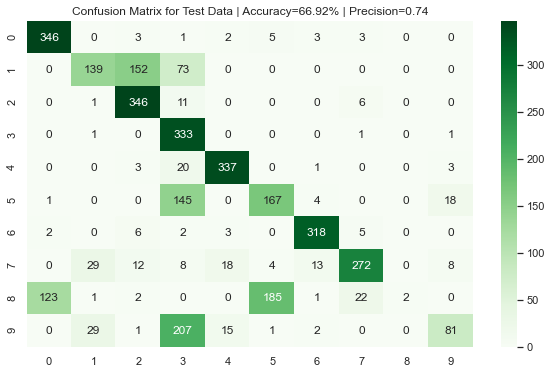

In [65]:
models = MakeForest()
y_pre = Prediction(models)
CalculateMetricsAndPlot(np.array(test_data["class"]),y_pre)

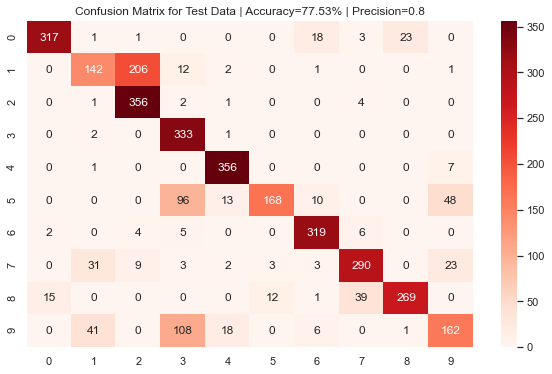

In [66]:
# repeat again with built-in library
RandomForest = RandomForestClassifier(max_depth=3,max_features=3)
RandomForest.fit(train_data[list(range(16))], train_data["class"])
y_pre = RandomForest.predict(test_data[list(range(16))])
CalculateMetricsAndPlot(np.array(test_data["class"]),y_pre,"Reds")